## Pandas怎样实现分组统计
**Pandas有个很神奇的点就是：选取和执行操作一般可以是列表**   

groupby: 先对数据分组，然后在每个分组熵应用聚合函数，转换函数
+ 分组使用聚合函数做数据统计
+ 遍历groupby的结果执行流程
+ 分组探索天气数据

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-2.776907,1.479032
1,bar,one,1.250586,-1.492227
2,foo,two,-1.663324,0.650384
3,bar,three,0.674444,-0.501442
4,foo,two,-1.612648,0.083169
5,bar,two,0.512607,-0.117209
6,foo,one,0.325267,-0.052181
7,foo,three,0.061636,-0.556246


In [5]:
df.groupby("B").sum()

,C,D
B,,
one,-1.201054,-0.065376
three,0.736080,-1.057688
two,-2.763365,0.616344


In [8]:
# 多个列的分组
df.groupby(["B","A"]).mean()

C         D
B     A                      
one   bar  1.250586 -1.492227
      foo -1.225820  0.713425
three bar  0.674444 -0.501442
      foo  0.061636 -0.556246
two   bar  0.512607 -0.117209
      foo -1.637986  0.366776

我们看到(A,B）就变成二级索引了


In [9]:
df.groupby(["A","B"],as_index=False).mean()  # 不变成二级目录

,A,B,C,D
0,bar,one,1.250586,-1.492227
1,bar,three,0.674444,-0.501442
2,bar,two,0.512607,-0.117209
3,foo,one,-1.225820,0.713425
4,foo,three,0.061636,-0.556246
5,foo,two,-1.637986,0.366776


### 同时查看多种数据


In [11]:
df.groupby(["A"]).agg([np.sum,np.mean,np.std])  # 我们看到列变成了多级索引

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  2.437637  0.812546  0.387888 -2.110878 -0.703626  0.709456
foo -5.665976 -1.133195  1.300715  1.604158  0.320832  0.777001

In [13]:
df.groupby(["A"])["C"].agg([np.sum,np.mean,np.max])  # 预过滤 花费时间更加少

,sum,mean,amax
A,,,
bar,2.437637,0.812546,1.250586
foo,-5.665976,-1.133195,0.325267


### 不同的列使用不同的聚合函数

In [15]:
df.groupby(["A"]).agg({"C":[np.sum,np.min],
                      "D":np.std})

C                   D
          sum      amin       std
A                                
bar  2.437637  0.512607  0.709456
foo -5.665976 -2.776907  0.777001

In [16]:
# 可以获取单个分组的数据


### 实例分组探索天气数据



In [18]:
fpath="./datas/beijing_tianqi/beijing_tianqi_2018.csv"
df=pd.read_csv(fpath)
df.loc[:, "bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')
df.loc[:, "yWendu"] = df["yWendu"].str.replace("℃", "").astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [19]:
# 查看每个月的最高温度 按照月份进行分组，
# 可不可按照条件实现分组呢？
df["yuefen"]=df["ymd"].str[:7]


In [21]:
high=df.groupby("yuefen")["bWendu"].max()
high

yuefen
2018-01     7
2018-02    12
2018-03    27
2018-04    30
2018-05    35
2018-06    38
2018-07    37
2018-08    36
2018-09    31
2018-10    25
2018-11    18
2018-12    10
Name: bWendu, dtype: int32

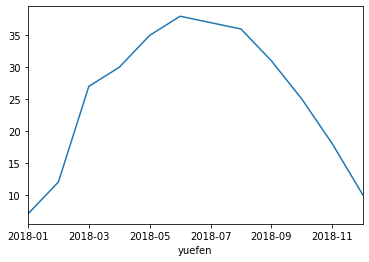

In [23]:
high.plot()  # index为横轴，数据为数轴

In [25]:
# 查看每个月的最高温度，最低温度和空气指数
low=df.groupby("yuefen")["bWendu"].min()
aqi=df.groupby("yuefen")["aqi"].mean()
aqi

yuefen
2018-01     60.677419
2018-02     78.857143
2018-03    130.322581
2018-04    102.866667
2018-05     99.064516
2018-06     82.300000
2018-07     72.677419
2018-08     59.516129
2018-09     50.433333
2018-10     67.096774
2018-11    105.100000
2018-12     77.354839
Name: aqi, dtype: float64

In [27]:
group=pd.merge(low,aqi,left_on="yuefen",right_on="yuefen",how="inner")
group2=pd.merge(group,high,left_on="yuefen",right_on="yuefen",how="outer")
group2

,bWendu_x,aqi,bWendu_y
yuefen,,,
2018-01,-4,60.677419,7
2018-02,-1,78.857143,12
2018-03,4,130.322581,27
2018-04,10,102.866667,30
2018-05,18,99.064516,35
2018-06,23,82.300000,38
2018-07,25,72.677419,37
2018-08,26,59.516129,36
2018-09,19,50.433333,31


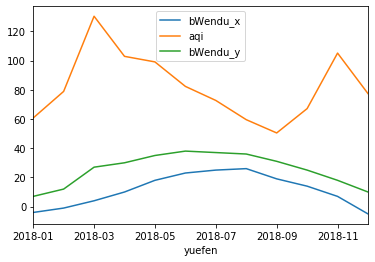

In [28]:
group2.plot()

###  总结
一个DataFrame和可以直接画出一个plot图表

In [38]:
# 构建一个y=xlogx的图标
import math
x=[i for i in range(0,18,1)]
y=[]
for i in x:
    y.append(i**2)
print(y)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289]


In [42]:
df2=pd.DataFrame({
    "A":x,
    "B":y
})
df2

,A,B
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [48]:
df3=df2.set_index("A")
df3

,B
A,
0,0
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64


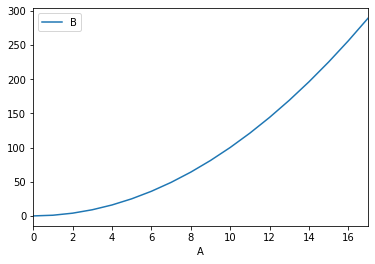

In [49]:
df3.plot()